In [5]:
## Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [6]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
# Add the lats and lngs into a list
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
## Calling the API and Parsing JSON Data
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through alll the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    
    # create end point url
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers an d the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count 
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced skip the city
    except:
        print("City not found, skipping...")
        pass
        
# indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | panzhihua
Processing Record 2 of Set 1 | yunjinghong
City not found, skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | batagay
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | malchevskaya
Processing Record 12 of Set 1 | tutoia
Processing Record 13 of Set 1 | biak
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | onega
Processing Record 16 of Set 1 | champerico
Processing Record 17 of Set 1 | tomatlan
Processing Record 18 of Set 1 | monchegorsk
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | okato
Processing Record 22 of Set 1 | jamestown
Processing Reco

Processing Record 37 of Set 4 | tasbuget
City not found, skipping...
Processing Record 38 of Set 4 | zeya
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | borogontsy
Processing Record 43 of Set 4 | yatou
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | viedma
Processing Record 46 of Set 4 | ha tinh
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | inongo
Processing Record 49 of Set 4 | tilichiki
Processing Record 50 of Set 4 | kenai
Processing Record 1 of Set 5 | novyy urengoy
Processing Record 2 of Set 5 | rorvik
Processing Record 3 of Set 5 | louisbourg
City not found, skipping...
Processing Record 4 of Set 5 | san rafael
Processing Record 5 of Set 5 | joshimath
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | stykkisholmur
Processing Record 8 of Set 5 | srednekolymsk
Processing Record 9 of Set 5 | yellowknife
Processing R

Processing Record 28 of Set 8 | nara
Processing Record 29 of Set 8 | saint-leu
Processing Record 30 of Set 8 | ranfurly
Processing Record 31 of Set 8 | gleisdorf
Processing Record 32 of Set 8 | guarapari
Processing Record 33 of Set 8 | pucallpa
Processing Record 34 of Set 8 | leshukonskoye
Processing Record 35 of Set 8 | hobyo
Processing Record 36 of Set 8 | dalbandin
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | shahrud
Processing Record 39 of Set 8 | nandi hills
Processing Record 40 of Set 8 | zhigalovo
Processing Record 41 of Set 8 | antanifotsy
Processing Record 42 of Set 8 | jaque
Processing Record 43 of Set 8 | oranjestad
Processing Record 44 of Set 8 | ocampo
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | banswara
Processing Record 47 of Set 8 | port macquarie
Processing Record 48 of Set 8 | nakhon nayok
Processing Record 49 of Set 8 | cockburn town
Processing Record 50 of Set 8 | nanga eboko
Processing Record 1 of Set 9 | katob

Processing Record 13 of Set 12 | agva
City not found, skipping...
Processing Record 14 of Set 12 | fare
Processing Record 15 of Set 12 | flinders
Processing Record 16 of Set 12 | foligno
Processing Record 17 of Set 12 | japura
Processing Record 18 of Set 12 | puerto carreno
Processing Record 19 of Set 12 | college station
Processing Record 20 of Set 12 | malwan
City not found, skipping...
Processing Record 21 of Set 12 | padang
Processing Record 22 of Set 12 | bagdarin
Processing Record 23 of Set 12 | neuquen
Processing Record 24 of Set 12 | san pedro
Processing Record 25 of Set 12 | hondo
Processing Record 26 of Set 12 | gorontalo
Processing Record 27 of Set 12 | boma
Processing Record 28 of Set 12 | paita
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | santa eulalia del rio
City not found, skipping...
Processing Record 31 of Set 12 | road town
Processing Record 32 of Set 12 | kerki
City not found, skipping...
Processing Record 33 of Set 12 | fort nelson
Pr

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Reorder the columns to make it easier to read
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into csv
city_data_df.to_csv(output_data_file,index_label="City_ID")

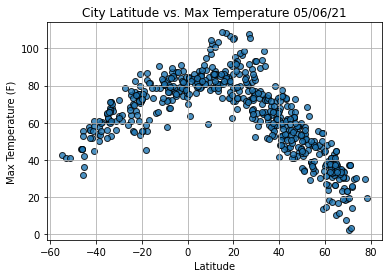

In [9]:
## Visualizations - Basic scatter plots
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            ec="k", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

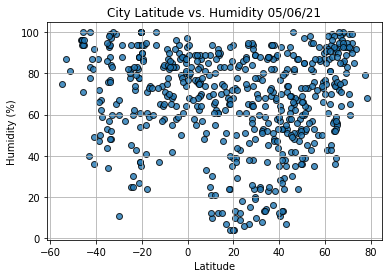

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

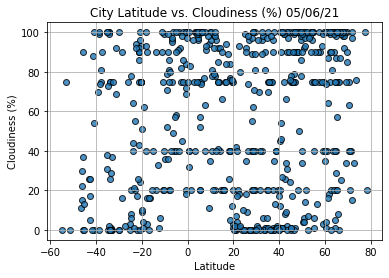

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

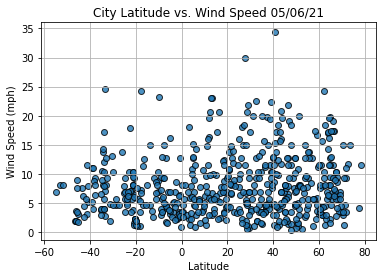

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [13]:
## Plot linear regresstions
#Create a function to perform linear regression on the weather data, plot reg line, print equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values,y_values)
    
    # Calculate the regression line y_values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot reg line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("y_label")
    plt.title(title)
    
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
556,Siocon,PH,2021-05-06 15:58:41,7.7061,122.1353,81.10,81,100,5.28
557,Beringovskiy,RU,2021-05-06 15:58:41,63.0500,179.3167,17.53,96,81,2.91
559,Leiyang,CN,2021-05-06 15:58:43,26.4024,112.8591,71.13,95,98,1.52
560,Sudak,UA,2021-05-06 15:58:44,44.8500,34.9667,59.23,61,24,5.32
561,Hoi An,VN,2021-05-06 15:58:45,15.8794,108.3350,82.40,83,20,2.30
562,Harper,LR,2021-05-06 15:58:45,4.3750,-7.7169,79.95,82,100,9.93
563,Pundaguitan,PH,2021-05-06 15:58:46,6.3711,126.1689,82.31,78,100,14.32
564,Aksu,CN,2021-05-06 15:58:47,41.1231,80.2644,74.28,13,100,4.43
566,Roald,NO,2021-05-06 15:58:48,62.5833,6.1333,48.99,43,0,18.41
567,Magrath,CA,2021-05-06 15:58:49,49.4167,-112.8686,53.60,50,100,12.66


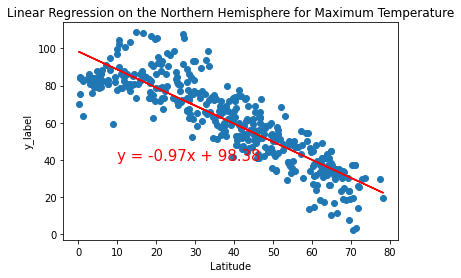

In [22]:
# Linear regression on max temperature for N. Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values, 
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))
plt.savefig("weather_data/Fig5.png")

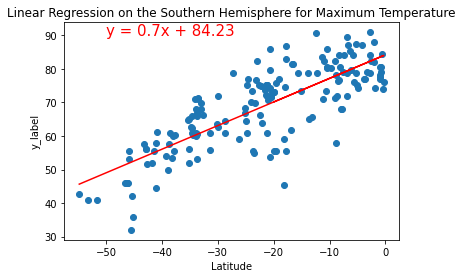

In [23]:
# Linear regression on Max Temp for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))
plt.savefig("weather_data/Fig6.png")

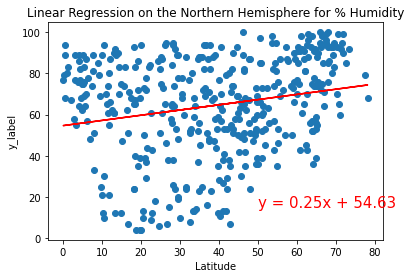

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,15))
plt.savefig("weather_data/Fig7.png")

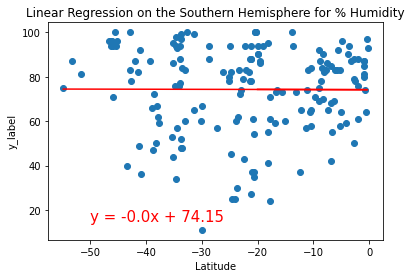

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))
plt.savefig("weather_data/Fig8.png")

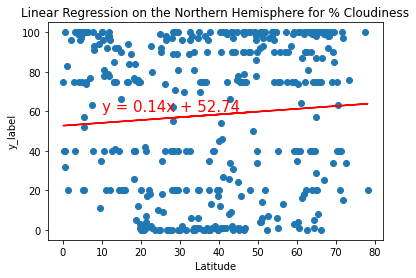

In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Cloudiness", "Cloudiness",(10,60))
plt.savefig("weather_data/Fig9.png")

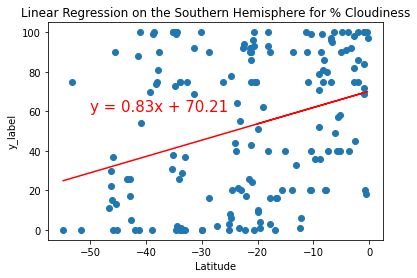

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
plt.savefig("weather_data/Fig10.png")

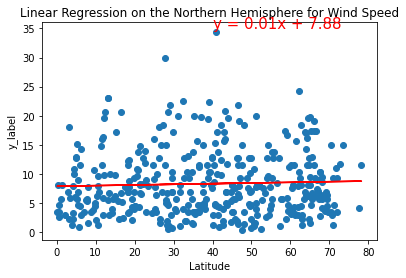

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
plt.savefig("weather_data/Fig11.png")

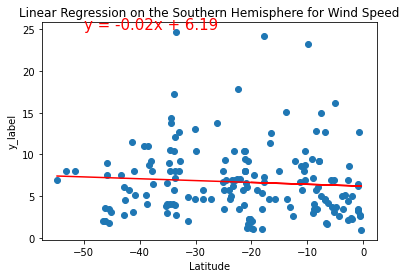

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))
plt.savefig("weather_data/Fig12.png")